In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import ast
import re
import pickle 
import warnings
matplotlib.style.use('ggplot')
warnings.filterwarnings("ignore")

**Comment for TAs : The continuation of Milestone 2 starts at section II**

#  Listing Keywords : 

First we made a list of topics we want to tackle in the tweets.

Topics : 
- Intermittent fasting.
- Veganism. 
- Minimalist life. 
- Paleo diet.
- Meditation. 

Then we made a few keywords for the topics listed above in all languages in switzerland to use when extracting our tweets of interest. 

In [2]:
#Keywords for our tweets of interest. 
Intermittent_fasting ={'intermittentfasting','intermittierendefasten','jeuneintermittent','digiunointermittente'}
Veganism={'plantbased','vegan','veganism','vegane','veganisme'}
Minimalism={'minimalistlife','minimalism','minimalist','minimalistischer','minimalista'}
Meditation={'meditation','meditazione'}
Paleo={'regimepaleo','paleodiet','palaodiat','palao','dietapaleo','ketogenic','ketogenicdiet','ketogenediat','ketogene','dietachetogenica','chetogenica','regimecetogene','cetogene'}

# I. Working on 10 files : 

## 1. Loading the Dataset : 

As a first attempt, we took 10 files of the swiss-tweet dataset to take a look at what the files contain and how they are organized. 

Also, we wanted to see how well the tweets extraction with keywords works on a smaller set to avoid running it on the entire dataset and wait for hours to get bad results.

The 10 files used are : harvest3r_twitter_data_01-01_0.json, harvest3r_twitter_data_01-02_0.json, harvest3r_twitter_data_01-03_0.json, harvest3r_twitter_data_01-04_0.json, harvest3r_twitter_data_01-05_0.json, harvest3r_twitter_data_01-06_0.json, harvest3r_twitter_data_01-07_0.json, harvest3r_twitter_data_01-08_0.json, harvest3r_twitter_data_01-09_0.json, harvest3r_twitter_data_01-10_0.json

In [3]:
#This function iterates over all files in the dataset folder and puts them in the pandas dataframe that we will call tweets.
def load_tweets(path):
    """
    Returns list of tweets extracted by keyword.
    :param path: String  
    :return: list
    """
    tweets=pd.DataFrame([])
    directory = os.fsencode(path)
    for file in tqdm(os.listdir(directory)):
        filename = os.fsdecode(file)
        new_tweet=pd.read_json(path+filename)
        
        tweets=tweets.append(new_tweet,ignore_index=True)
    tweets=tweets.reset_index(drop=True)
    return tweets

In [8]:
#Loading tweets contained in the folder swiss-tweet in the Datasets folder.
tweets=load_tweets('./Datasets/swiss-tweet/')

## 2. Extracting target tweets : 

The function below was written to delete all spaces and to turn all letters to lower case and replace all letters such as é with e and ä with a and so on. 

The goal of using this function is to increase matching with keywords chances and also to make the keyword lists shorter and not have to exhaustively list all possible combinations of target keywords in the list above.


In [9]:
def replace_characters(text) : 
    """
    Returns the text without spaces and special language letters (i.e é for French, ä for German)
    :param text: String
    :return: string
    """
    text=text.lower()
    text=text.replace(' ','')
    text=text.replace('é','e')
    text=text.replace('è','e')
    text=text.replace('ê','e')
    text=text.replace('ë','e')
    text=text.replace('ä','a')
    text=text.replace('û','u')
    text=text.replace('ü','u')
    
    return text

In [5]:
def extract_target_tweets(tweets,keywords):
    """
    Returns the tweets that contain one or many of the keywords in the parameter keywords.
    :param tweets: list of dict
    :param keywords: dict
    :return: graph
    """
    #Initializing the indices array.
    target_indices=[]
    
    #Iterate over all tweets
    for i in range(len(tweets['_source'])) : 
        
        #Preprocess the tweets text.
        tweet=replace_characters(tweets['_source'][i]['main'])
        
        for j in keywords : 
            #If tweet contains a keyword save its index in target_indices list.
            if(j in tweet) : target_indices.append(i)
    return target_indices

Below, we look for indices of tweets that contain keywords of topics listed in Listing Keywords section using the two functions defined above.

In [9]:
#Running the function extract_target_tweets on each topic.

intermittent_fasting_tweets=extract_target_tweets(tweets,Intermittent_fasting)
veganism_tweets=extract_target_tweets(tweets,Veganism)
minimalism_tweets=extract_target_tweets(tweets,Minimalism)
meditation_tweets=extract_target_tweets(tweets,Meditation)
paleo_tweets=extract_target_tweets(tweets,Paleo)

In [10]:
#Keeping a list of all indices for later use.
tweets_of_interest_indices=np.unique(intermittent_fasting_tweets+veganism_tweets+minimalism_tweets+meditation_tweets+paleo_tweets)

## Results : 

In [11]:
'Number of tweets about Intermittent fasting : ' +str(len(intermittent_fasting_tweets)),'Number of tweets about veganism : '+str(len(veganism_tweets)),'Number of tweets about Minimalism :' + str(len(minimalism_tweets)),'Number of tweets about Meditation: ' +str(len(meditation_tweets)),'Number of tweets about paleo diet : '+ str(len(paleo_tweets))

('Number of tweets about Intermittent fasting : 0',
 'Number of tweets about veganism : 252',
 'Number of tweets about Minimalism :24',
 'Number of tweets about Meditation: 216',
 'Number of tweets about paleo diet : 40')

The topics that got the most results are veganism and meditation. Intermittent fasting had no results whatsoever with the keywords provided. Minimalism and the paleo diet got very little results. 

## 3. Exploring resulting tweets : 

To explore the resulting extracted tweets, we get the indices from the lists constructed above (intermittent_fasting_tweets, veganism_tweets, minimalism_tweets, meditation_tweets, paleo_tweets) and explore its content. 

### 3.1 Results for Paleo Diet : 

After looking at some of the Paleo diet resulting tweets, we see that most of them were not tweets about the paleo diet at all. 

We see that most of them talk about the paleo festival, exactly like the example tweet shown below.

In [12]:
tweets['_source'][208582]['main']

'@louiseattaqueofficiel at @paleofestival http://www.sigfredoharo.com/paleo-16\xa0 © Sigfredo Haro photography pour le... http://fb.me/6bvdTws5u\xa0'

### Next step : 

The bad results actually look like they were caused by bad choice of keywords. So we may try to fix the keywords for the paleo diet or better yet use another more sophisticated technique (Latent Dirichlet Allocation).

If the results are still small, we might drop this topic. 

### 3.2 Results for Veganism : 

The results for veganism are good, in terms of number and accuracy. 

In [13]:
#Example of tweet about veganism and its corresponding sentiment as provided in the dataset.

tweets['_source'][327460]['main'] , tweets['_source'][327460]['sentiment']

('The #simplelife . Freshly made #coffeemorning & Spanish #oliveoil #toast #vegan #simplicity #mylifestyle #MomentOfTruth #awe #love #life',
 'POSITIVE')

### 3.3 Results for meditation : 

It is not surprising that we found many results about meditation, as it is already popular in the western world and more specifically in Switzerland. 

However, some results we got are ads for guided meditation sessions.

In [14]:
#Example of tweet about meditation.
tweets['_source'][294749]['main']

'This school replaced detention with meditation. The results are stunning.'

### Next step :

Filter out all the tweets that contain ads about meditation.

### 3.4 Results for Minimalism : 

The resulting tweets for minimalism are completely off. We may get rid of the topic altogether.

In [15]:
#Example of bad result of tweet about minimalism.
tweets['_source'][242242]['main']

'Minimalist Porcelain Clocks Like a Scale http://v.virg0.org/2bLigJl\xa0 #design'

### 3.5 Results for Intermittent Fasting : 

The intermittent fasting trend is almost inexistant in the tweets we selected. So, we could drop it for the rest of the project if the extraction for the full dataset gives the same result.

## 4. Sentiment Graphs : 

Fortunately, most of the sentiments were provided with the dataset. So, in this section we will have a look at how they were distributed.

In [10]:
def get_list_of_sentiments(indices): 
    """
    Returns list of sentiment at indices passed as parameter.
    :param indices: list
    :return: list
    """
    sentiments=[]
    for i in indices : 
        try: 
            sentiment=tweets['_source'][i]['sentiment']
            sentiments.append(sentiment)
        #In case there isn't a sentiment field just ignore and keep going.
        except KeyError : continue
    return sentiments

In [209]:
def plot_sentiments(sentiments,title) : 
    """
   Plots in a pie plot the sentiments proportions in list sentiments passed as parameter
    :param sentiments: list
    :param title: string
    """
    labels=np.unique(sentiments)
    values=[sentiments.count(i) for i in labels]
    explode = (0.1, 0.1, 0)
    colors = ['maroon', 'purple','darkblue' ]
    plt.title(title)
    plt.pie(values,explode=explode,colors=colors,labels=labels,shadow=True)
    fig = plt.gcf()
    fig.set_size_inches(3,3)
    plt.show()

Below, we will see the sentiments about the trends that had good results (veganism and meditation) as they were provided in the dataset sample.

### 4.1 Pie plot of veganism sentiments : 

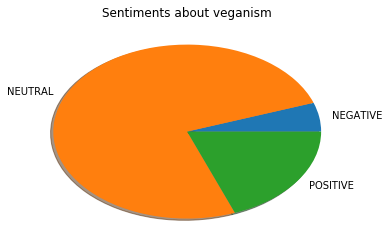

In [399]:
#Getting a list of sentiments of veganism 
veganism_sentiments=get_list_of_sentiments(veganism_tweets)

#Drawing a pie plot of the sentiments.
plot_sentiments(veganism_sentiments,'Sentiments about veganism')


### 4.2 Pie plot of meditation sentiments : 

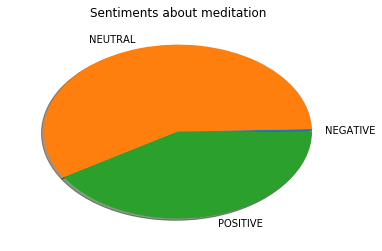

In [22]:
#Getting a list of sentiments of meditation. 
meditation_sentiments=get_list_of_sentiments(meditation_tweets)

#Drawing a pie plot of the sentiments.
plot_sentiments(meditation_sentiments,'Sentiments about meditation')

### 4.3 Discussion :

From the two pie plots, we notice that most of the sentiments are neutral. By exploring the dataset a little we can see that many tweets that should have been positive or negative are labeled as neutral. 

Which is why we will try to determine sentiments of tweets on our own for the next milestone and see if we get better results.

## 5. What comes next : 

1. Find a better way to extract tweets about each topic instead of the tentative approach done above. <br>
2. Run it on all the tweets in the dataset. <br>
3. Show graphs about the sentiments of each topic.<br>
 - 3.1. Go more in details in graphs of sentiments (sentiment per gender ,per time period ,per region of Switzerland and so on...)<br>
 - 3.2. Compare between graphs of topics.
 
4. We might add new topics for more results about trending lifestyles in Switzerland (e.g Gluten free)
5. Present all results with conclusions about what trends seem to get the most love.
6. The report will contain all the steps taken up to milestone 3 to get our results, as well as a discussion of the results.
7. The presentation will contain a short description of steps taken to get our results, as well as a presentation of the results with graphs. And finally, draw some conclusions.<br>

(Optional) : We would also like to see what kind of results we get from the bigger twitter dataset.

# II. Running previous steps on entire swiss tweet dataset : 

We ran a spark script on the entire dataset using the cluster and we filtered the tweets we wanted using keywords extraction, the same method described in the previous section.

The resulting dataset is a group of json files containing a variety of keys referring to information of tweets, including : tweet text, sentiment, location, gender, language of the tweet and so on... 

In [4]:
path = './Datasets'

We had to adapt some function described above to the new form of our resulting files.

So we changed the function load_tweets into load_cluster_results.

In [6]:
def load_cluster_results(path):
    """
    Loads tweets resulted from the extraction using a cluster at path passed as parameter.
    :param path: string
    :return: list
    """
    tweets=[]
    directory = os.fsencode(path)
    for file in os.listdir(directory):
        
        filename = os.fsdecode(file)
        if(filename=='.DS_Store' or '_SUCCESS' in filename) : continue

        lines=[line.rstrip('\n') for line in open(path + filename)]
        for line in lines : 
            data = json.dumps(ast.literal_eval(line))
            line = json.loads(data)
            tweets.append(line)
            
    return tweets

## 1. Loading tweets :

Here we run load_cluster_results on each trend.

In [10]:
veganism_tweets = load_cluster_results(path + '/veganism_semi_final/')
meditation_tweets = load_cluster_results(path + '/meditation/')
paleo_tweets = load_cluster_results(path + '/paleo/')
intermittent_tweets = load_cluster_results(path + '/fasting/')
minimalism_tweets = load_cluster_results(path + '/minimalism/')

In [11]:
'Number of tweets about Intermittent fasting : ' +str(len(intermittent_tweets)),'Number of tweets about veganism : '+str(len(veganism_tweets)),'Number of tweets about Minimalism :' + str(len(minimalism_tweets)),'Number of tweets about Meditation: ' +str(len(meditation_tweets)),'Number of tweets about paleo diet : '+ str(len(paleo_tweets))

('Number of tweets about Intermittent fasting : 3',
 'Number of tweets about veganism : 5908',
 'Number of tweets about Minimalism :423',
 'Number of tweets about Meditation: 6490',
 'Number of tweets about paleo diet : 91')

We see that the results of intermittent fasting and paleo diet are still very small compared to the other two results.<br> The number results for veganism and meditation are both above 5000 tweets, which is way bigger than the other two.

## 2. Filtering of the results : 

There are still bad results for paleo diet so we made a list of negative keywords which will indicate that a tweet is not what we are looking for.

And by using filter_tweets defined below we will filter out tweets that are out of context.


Also, for meditation tweets, we see that there are many tweets that are guided meditation ads or a radio station name. So we filtered those out as well to get a better set for our sentiment analysis.

In [12]:
#Negative keywords.
paleo_neg_keywords = {'festival','paleontology','fossil','paleolite','archeologie','archeology','paleovert','johnftpayne','kevadams','nicipaleo','palaontologie','palaotros'}
meditation_neg_keywords = {'studios','♫','nowplaying','meditationartby','osho','heal#release#love','myhealingshop'}

In [13]:
def filter_tweets(tweets,neg_keywords) : 
    """
    Filters out tweets that contain one or many of negative keywords passed as parameter neg_keywords and return it.
    :param tweets: list
    :param neg_keywords: dict
    :return: list
    """
    toremove=[]
    for tweet in tweets : 
        for keyword in neg_keywords : 
            if (keyword in replace_characters(tweet['main'])) :
                
                toremove.append(tweet)
                    
    tweets = [tweet for tweet in tweets if tweet not in toremove]    
    return tweets

In [14]:
#Filtering the tweets.
filtered_paleo= filter_tweets(paleo_tweets,paleo_neg_keywords)
filtered_meditation = filter_tweets(meditation_tweets,meditation_neg_keywords)

## 3. Sentiments : 

In [31]:
def get_list_of_sentiments(tweets):
    """
    Return the list of sentiments of the tweets resulted from the extraction on the cluster.
    :param tweets: list of dicts 
    :return: list of strings
    """
    
    sentiments=[]
    for tweet in range(len(tweets)) : 
        try: 
            sentiment=tweets[tweet]['sentiment']
            sentiments.append(sentiment)
        #In case there isn't a sentiment field just ignore and keep going.
        except KeyError : continue
    return sentiments

In [32]:
def pieplots(lists,titles,figsize):
    """
    Draws pieplots of lists sentiments with their corresponding titles.
    :param lists: list of list of dicts 
    :param titles: list of strings
    :param figsize: tuple
    """
    
    sentiments=[get_list_of_sentiments(list_) for list_ in lists]

    fig, axes = plt.subplots(nrows=1, ncols=len(lists), figsize=figsize)
    labels=['POSITIVE','NEGATIVE','NEUTRAL']
    values=[]
    for sentiment in sentiments : 
        values.append([sentiment.count(i) for i in labels])

    explode = (0.1, 0.1, 0)
    colors = [ 'darkblue','maroon','purple' ]
    for i in range(len(axes)):

        axes[i].pie(x=values[i],explode=explode,colors=colors,labels=labels,shadow=True)
        axes[i].set_xlabel(titles[i],fontsize=12)

    plt.show()

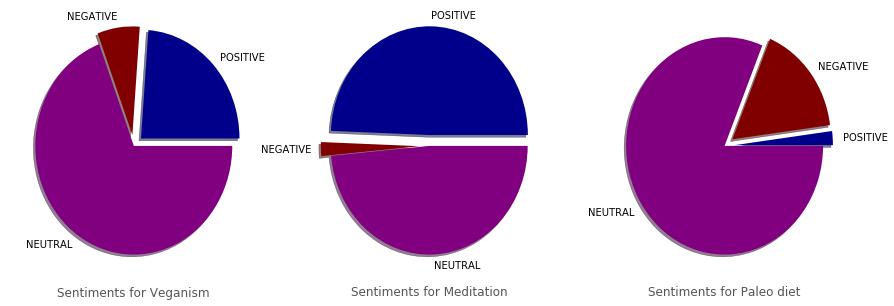

In [20]:
trends = [veganism_tweets,filtered_meditation,filtered_paleo]
titles = ['Sentiments for Veganism','Sentiments for Meditation','Sentiments for Paleo diet']
pieplots(trends,titles,(15,5))

- We can see that the tweets about meditation are overwhelmingly positive and contain very few negative tweets.
- On the other hand, sentiments about the paleo diet are way more negative than positive, we could assume that people didn't do well on a paleo diet compared to the other two trends, but the number of tweets about paleo diet is very small compared to the number of tweets about meditation and veganism. So, we can't make that claim.
- The sentiments of tweets about veganism are more so positive than negative, but we can say that meditation takes the win within Switzerland.

## Problems :

- We can see that there are not enough tweets for paleo diet (ketogenic diet), we will have to resort to the tweets leon dataset to see better results.
- For minimalism the results are completely off. It is better to just drop the trend , at least for now.

# III. Running on global tweets leon dataset : 

- For our sentiment analysis we will use the class SentimentIntensityAnalyzer from the package nltk.sentiment.vader.<br> This library is known to work well for social media texts, which is why, we chose it.<br>
- However, this library only works well for texts in English. Therefore, to adapt our dataset to our sentiment analysis, we will have to translate all tweets that are not in English before analyzing their sentiments.<br>
- For the translation we chose the library googletrans which is a free google translate python api.

## Imports for our sentiment analysis :

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from googletrans import Translator

In [31]:
#Initializing objects for sentiment analysis and translation.
sentiment_analyzer = SentimentIntensityAnalyzer()
translator=Translator()

## Helper functions : 

In [27]:
def return_sentiments(tweets,key) : 
    """
    Add/modify the key sentiment for each tweet from tweets-leon/swiss-tweets dataset and give it its sentiment and then return the tweets.
    :param tweets: list
    :return: list
    """
    language = ""
        
    for tweet in tweets : 
        
        if(key=='leon') : language=tweet['tweet'].split('\t')[0]
        elif(key=='swiss') : language=tweet['lang']
        else : raise KeyError('No such key')

        main=tweet['clean']
        
        
        translation=''
        #If the language is not english, then translate it.
        if(language!='en'):
            
            
            try:

                translation=translator.translate(main,dest="en").text

            except Exception :
                continue
        else : translation = main       
        sentiment=sentiment_analyzer.polarity_scores(translation)
        pos, neg, neutral = sentiment['pos'],sentiment['neg'],sentiment['neu']
        if(neutral >= 0.7) :tweet['sentiment'] = 'NEUTRAL'
        else : 
            if( max(pos, neg)==pos) : tweet['sentiment'] = 'POSITIVE'
            else :  tweet['sentiment'] = 'NEGATIVE'
    return tweets

In [28]:
def clean(text):
    """
    Preprocesses the tweets for translation by removing special characters, @users and web links from tweets.
    :param text: string
    :return: string
    """
    
    #Remove characters that are not letters
    cleanedmain =  ''.join([i for i in text if (i.isalpha() or i==' ')])
    #Split text by spaces.
    splitted = cleanedmain.split(' ')
    link = ''
    #If there's @user of a web link, remove it.
    for i in splitted : 
        if(i[:4]=='http') : cleanedmain=cleanedmain.strip(i)
        if(i[:1]=='@') : cleanedmain=cleanedmain.strip(i)
                
    return cleanedmain    

In [29]:
def add_cleaned_tweet(tweets) : 
    """
    Adds preprocessed version of the tweet to each tweet as a new dict element.
    :param tweets: list
    :return: list
    """
    for tweet in tweets : 
        cleaned = clean(tweet['main'])
        tweet['clean'] = cleaned

In [30]:
def load_files_leon(path):
    """
    Loads tweets extracted from tweets-leon using the cluster.
    :param path: seting
    :return: list
    """
    lines=[]
    for dirpath,_,filenames in os.walk(path):
        for f in filenames:
            
            #No need for files name .DS_Store and _SUCCESS that were generated by the cluster.
            if(f=='.DS_Store' or f=='_SUCCESS') : continue
            
            lines.extend([line.rstrip('\n') for line in open(dirpath+'/' + f)])
            

    return lines

## 1. Swiss tweets : 

### 1.1 Running sentiment analysis on swiss tweets : 

First, for the sake of fairness we will run the sentiment analyzer on the swiss-tweets dataset. <br>
To do that, we will first add a preprocessed version of the tweets as a new dict element. Then, we will run sentiment analysis on these tweets.

In [54]:
#Adding preprocessed version of tweets as new dict elements to our tweets. 
add_cleaned_tweet(filtered_meditation)
add_cleaned_tweet(veganism_tweets)
add_cleaned_tweet(filtered_paleo)

In [262]:
#Performing sentiment analysis on tweets.
filtered_meditation= return_sentiments(filtered_meditation,'swiss')
veganism_tweets=return_sentiments(veganism_tweets,'swiss')
filtered_paleo=return_sentiments(filtered_paleo,'swiss')

100%|██████████| 48/48 [00:18<00:00,  2.55it/s]


In [269]:
#Saving the results.
pickle.dump( filtered_paleo, open( "paleo.p", "wb" ) )
pickle.dump( filtered_meditation, open( "meditation.p", "wb" ) )
pickle.dump( veganism_tweets, open( "veganism.p", "wb" ) )

In [36]:
#loading the results back.
paleo_swiss=pickle.load( open( "paleo.p", "rb" ) )
meditation_swiss=pickle.load( open( "meditation.p", "rb" ) )
vegan_swiss=pickle.load(  open( "veganism.p", "rb" ) )

### 1.2 Plots of swiss tweets sentiments :

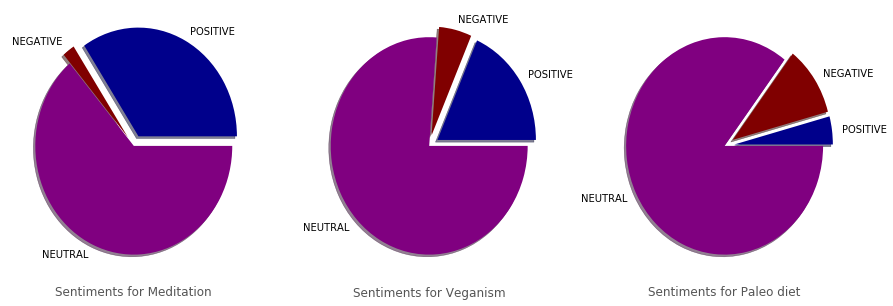

In [78]:
titles=['Sentiments for Meditation','Sentiments for Veganism','Sentiments for Paleo diet']
trends=[meditation_swiss,vegan_swiss,paleo_swiss]
pieplots(trends,titles,(15,5))

- The sentiments fractions are a little different from the sentiments given by default in the dataset, however, sentiments about meditation still take the lead in terms of fraction of positive sentiments followed by veganism. 
- The paleo diet still doesn't get much love within the number of tweets we got.

## 2. Tweets leon :

### 2.1 Loading results : 

In [36]:
tweets_leon_minimalism = load_files_leon(path + '/minimalism_full/')  
tweet_leon_fasting=load_files_leon(path + '/fasting_full/_temporary/0/')
tweets_leon_meditation = load_files_leon(path + '/meditation_full/')   
tweet_leon_veganism=load_files_leon(path + '/veganism_semi_final_full_3/_temporary/0/')
tweets_leon_paleo = load_files_leon(path+"/paleo_full/")   

#### Time to decide to drop minimalism : 

As we can see from the results shown below, the results for minimalism are unfortunately completely off for the tweets-leon dataset too. So, it is better to just drop this trend rather than work with bad tweets set.

In [63]:
print_=[print(' - ' +tweets_leon_minimalism[i].split('\t')[-1]) for i in range(3)]

 - Jessie don't get stay is an emotional and minimalistic song. Your runs do add a damn thing baldy
 - @Cam_Is_Like @BigGhostFASE actually I think this was perfected by Primo too. Minimalism and negative space = Gang Starr
 - On Sight was kinda whatever... Black Skinhead and I am a god are crazy production wise tho, minimalist lyricism


#### But on a positive note : 

The results for the paleo diet and for intermittent fasting are great ! 

**Paleo diet tweets sample**

In [60]:
print_=[print(' - ' +tweets_leon_paleo[i].split('\t')[-1]) for i in range(27,30)]

 - Trying to go as paleo as i can before christys fucks me in the ass. Sunflower seeds!
 - RT @AngelaJuas: Listas para empezar hogueras @RocioPalao @cristinadior8 @AlbaRovira93 @mariahoras y Sara y el whattsap no esta disponibl ...
 - It's not nice to generalise. What if someone says all alternative bands are talentless emo faggots?


**Intermittent fasting tweets sample**

In [64]:
print_=[print(' - ' + tweet_leon_fasting[i].split('\t')[-1]) for i in range(3)]

 - @MensFitness have any links on intermittent fasting?  On it for a week &amp; like it, but looking for reassurance.
 - intermittent fasting is amazing
 - Anyone trying #intermittentfasting (#IF)? What do u think about #fasting #diets? Fad? People just starving themselves? We'd like to hear!


### 2.2 Adapting datasets to our functions : 

First, we will transform our tweets into dicts containing two keys : <br>
- "main" which contains only the tweet
- "tweet" which contains all of the tweet as it was before.

Then, we will filter out tweets that contain the negative keywords.<br>
And finally, we will add another key to all our tweets called "clean" which contains the preprocessed tweet.

In [82]:
#Transforming tweets into dicts.
tweets_leon_paleo=[{'tweet' : tweet,'main': tweet.split('\t')[-1]} for tweet in tweets_leon_paleo]
tweets_leon_meditation=[{'tweet' : tweet,'main': tweet.split('\t')[-1]} for tweet in tweets_leon_meditation]
tweet_leon_fasting =[{'tweet' : tweet,'main': tweet.split('\t')[-1]} for tweet in tweet_leon_fasting]
tweet_leon_veganism =[{'tweet' : tweet,'main': tweet.split('\t')[-1]} for tweet in tweet_leon_veganism]

#Filter tweets with negative keywords
filtered_tweets_leon_paleo=filter_tweets(tweets_leon_paleo,paleo_neg_keywords)
filtered_tweets_leon_meditation=filter_tweets(tweets_leon_meditation,meditation_neg_keywords)

#Adding preprocessed version of tweet to tweets.
filtered_tweets_leon_paleo = [{'tweet' : tweet['tweet'],'main': tweet['main'],'clean':clean(tweet['main'])}  for tweet in filtered_tweets_leon_paleo]
filtered_tweets_leon_meditation = [{'tweet' : tweet['tweet'],'main': tweet['main'],'clean':clean(tweet['main'])}  for tweet in filtered_tweets_leon_meditation]
tweet_leon_fasting = [{'tweet' : tweet['tweet'],'main': tweet['main'],'clean':clean(tweet['main'])}  for tweet in tweet_leon_fasting]
tweet_leon_veganism = [{'tweet' : tweet['tweet'],'main': tweet['main'],'clean':clean(tweet['main'])}  for tweet in tweet_leon_veganism]

### 2.3 Running sentiment analysis on tweets leon : 

In [99]:
#Running sentiment analysis on four datasets.
sentiment_leon_paleo = return_sentiments(filtered_tweets_leon_paleo,'leon')
sentiment_leon_meditation = return_sentiments(filtered_tweets_leon_meditation,'leon')
sentiment_leon_fasting = return_sentiments(tweet_leon_fasting,'leon')
sentiment_leon_veganism = return_sentiments(tweet_leon_veganism,'leon')

In [149]:
bad=['pa la o', 'pale o', 'pala o','palaotra']

In [171]:
def filter_bad_results(tweets,keywords) : 
    result=[]
    
    for tweet in tweets :
        bad_tweet=False
        for b in bad : 
            if(b in tweet['main'].lower()) : bad_tweet=True 
        for key in keywords : 
            text = tweet['main']
            splitted = text.split(' ')
            for split in splitted : 
                try: 
                    character = split[0]
                except IndexError : continue
                if(split[0]=='@') :
                    text=text.replace(split,'')
            if(key in replace_characters(text) and  not bad_tweet ) :result.append(tweet)
            
    return result

In [195]:
sentiment_leon_paleo = filter_bad_results(sentiment_leon_paleo,Paleo)
sentiment_leon_meditation=filter_bad_results(sentiment_leon_meditation,Meditation)
tweet_leon_fasting = filter_bad_results(tweet_leon_fasting,Intermittent_fasting)
tweet_leon_veganism = filter_bad_results(tweet_leon_veganism,Veganism)

### 2.4 Saving results : 

In order to avoid running the time consuming sentiment analysis everytime, we saved the results in pickle files.

In [197]:
#Saving the results.
pickle.dump( sentiment_leon_paleo, open( "paleo_full.p", "wb" ) )
pickle.dump( sentiment_leon_meditation, open( "meditation_full.p", "wb" ) )
pickle.dump( tweet_leon_fasting, open( "fasting_full.p", "wb" ) )
pickle.dump( tweet_leon_veganism, open( "veganism_full.p", "wb" ) )

In [198]:
paleo = pickle.load(open( "paleo_full.p", "rb" ))
meditation=pickle.load(open( "meditation_full.p", "rb" ))
fast =pickle.load(open( "fasting_full.p", "rb" ))
vegan =pickle.load(open( "veganism_full.p", "rb" ))

## 2.5 Plots of sentiments: 

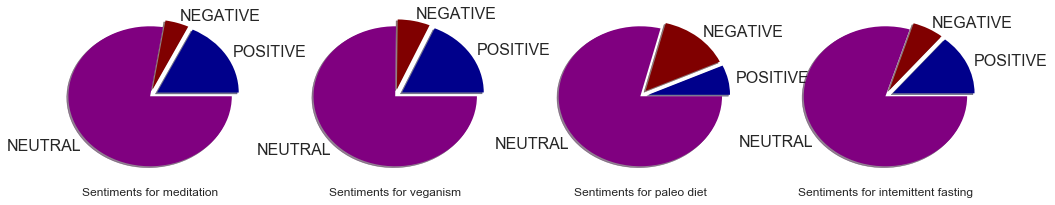

In [175]:
titles=['Sentiments for meditation','Sentiments for veganism','Sentiments for paleo diet','Sentiments for intemittent fasting']
trends=[meditation,vegan,paleo,fast]
pieplots(trends,titles,(15,3))

- All the sentiments are mostly positive (other than neutral tweets) and don't have a lot of negativity. But we can see that veganism has a slight edge over the other trends in terms of positivity and meditation has the least negative sentiments per tweet.
- The paleo diet gets good sentiments in the tweets posted by users worldwide compared to those posted in Switzerland.

## 3. Exploring the results : 

In [176]:
data_paleo = pd.DataFrame(paleo)
data_medit = pd.DataFrame(meditation)
data_fast  = pd.DataFrame(fast)
data_vegan = pd.DataFrame(vegan)

data_paleo = data_paleo.drop('clean', axis=1)
data_medit = data_medit.drop('clean', axis=1)
data_fast = data_fast.drop('clean', axis=1)
data_vegan = data_vegan.drop('clean', axis=1)

data_medit.head(6)

,main,sentiment,tweet
0,Yoga meditation. breakfast exercising in that...,NEUTRAL,en\t193462347791216640\tFri Apr 20 22:13:12 +0...
1,“@BelloyHugo: Une fille n'est jamais trop bien...,NEGATIVE,fr\t193462376975183872\tFri Apr 20 22:13:19 +0...
2,"alright, time to dabble in the DARK ARTS known...",NEUTRAL,en\t193462893063319552\tFri Apr 20 22:15:22 +0...
3,RT @DharmaApple: @MondoSamu @againststream YES...,POSITIVE,en\t193463136223903744\tFri Apr 20 22:16:20 +0...
4,Downloaded 4 of the most amazing apps today by...,NEUTRAL,en\t193464499439808514\tFri Apr 20 22:21:45 +0...
5,RT @brainwavetweets: #Meditation is not just r...,POSITIVE,en\t193465753679314945\tFri Apr 20 22:26:44 +0...


In [177]:
data_paleo_swiss = pd.DataFrame(paleo_swiss)[['main','sentiment','author_gender','likes','published']]
data_vegan_swiss = pd.DataFrame(vegan_swiss)[['main','sentiment','author_gender','likes','published']]
data_medit_swiss = pd.DataFrame(meditation_swiss)[['main','sentiment','author_gender','likes','published']]

In [178]:
def create_columns(row,n):
    
    try :
        row.split('\t')[1]
        
    except IndexError : return np.nan
    return row.split('\t')[n]

In [179]:
def process_dataframes(df):
    df['lang'] = df['tweet'].apply(lambda x : create_columns(x,0))
    df['id']   = df['tweet'].apply(lambda x : create_columns(x,1))
    df['date'] = df['tweet'].apply(lambda x : create_columns(x,2))
    df['user'] = df['tweet'].apply(lambda x : create_columns(x,3))
    del df['tweet']
    return df

In [180]:
data_paleo = process_dataframes(data_paleo)
data_medit = process_dataframes(data_medit)
data_fast  = process_dataframes(data_fast )
data_vegan = process_dataframes(data_vegan)

data_medit.head(6)

,main,sentiment,lang,id,date,user
0,Yoga meditation. breakfast exercising in that...,NEUTRAL,en,193462347791216640,Fri Apr 20 22:13:12 +0000 2012,aaronjleighton
1,“@BelloyHugo: Une fille n'est jamais trop bien...,NEGATIVE,fr,193462376975183872,Fri Apr 20 22:13:19 +0000 2012,ClairementHype
2,"alright, time to dabble in the DARK ARTS known...",NEUTRAL,en,193462893063319552,Fri Apr 20 22:15:22 +0000 2012,Vicky_Bit
3,RT @DharmaApple: @MondoSamu @againststream YES...,POSITIVE,en,193463136223903744,Fri Apr 20 22:16:20 +0000 2012,MondoSamu
4,Downloaded 4 of the most amazing apps today by...,NEUTRAL,en,193464499439808514,Fri Apr 20 22:21:45 +0000 2012,nclmllr
5,RT @brainwavetweets: #Meditation is not just r...,POSITIVE,en,193465753679314945,Fri Apr 20 22:26:44 +0000 2012,TheAshleyAlexis


In [181]:
sentiments_paleo = data_paleo[['sentiment','user']].groupby(['sentiment']).count()/len(data_paleo)
sentiments_medit = data_medit[['sentiment','user']].groupby(['sentiment']).count()/len(data_medit)
sentiments_fast = data_fast[['sentiment','user']].groupby(['sentiment']).count()/len(data_fast)
sentiments_vegan = data_vegan[['sentiment','user']].groupby(['sentiment']).count()/len(data_vegan)

In [182]:
sentiments_paleo = sentiments_paleo.transpose()
sentiments_paleo['LifeStyle'] = 'PaleoDiet'

sentiments_medit = sentiments_medit.transpose()
sentiments_medit['LifeStyle'] = 'Meditation'

sentiments_fast = sentiments_fast.transpose()
sentiments_fast['LifeStyle'] = 'Fasting'

sentiments_vegan = sentiments_vegan.transpose()
sentiments_vegan['LifeStyle'] = 'Veganism'

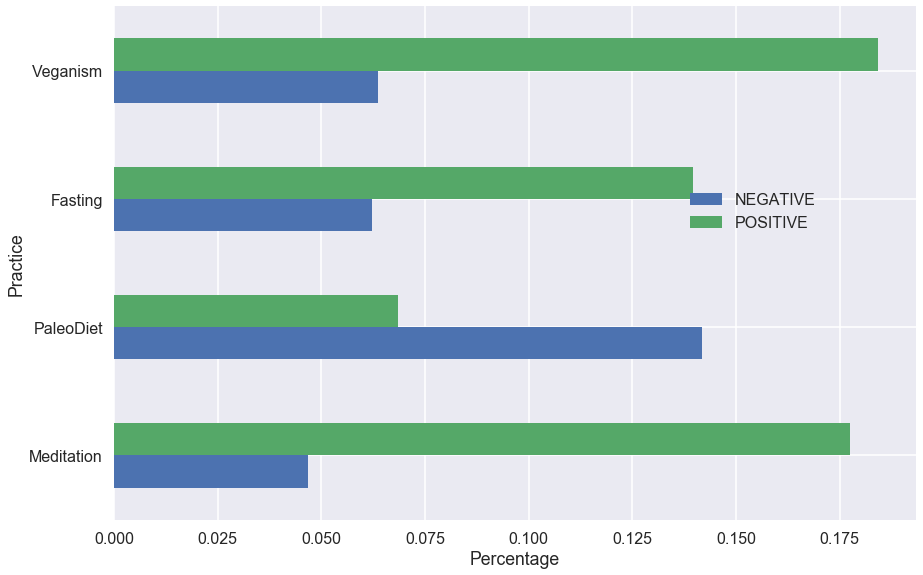

In [183]:
frames = [sentiments_medit,sentiments_paleo,sentiments_fast,sentiments_vegan]
result = pd.concat(frames).set_index('LifeStyle',drop=True)
result.drop('NEUTRAL',axis=1).plot.barh()
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.6))
plt.style.use('seaborn-deep')
plt.xlabel('Percentage')
plt.ylabel('Practice')
plt.show()

In [184]:
import datetime as dt

months={'Jan' : 1,'Feb' : 2, 'Mar' : 3,'Apr' : 4, 'May' : 5, 'Jun':6,'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12} 

def process_date(x):
    try :
        tab = x.split(' ')
        y = int(tab[5])
        m = months[tab[1]]
        d = int(tab[2])
    except  AttributeError : return np.nan
    return dt.date(y,m,d)

In [185]:
def get_year(x) : 
    try :
        ret = x.year
    except  AttributeError : return np.nan
    return ret

In [186]:
def groupByYear(df):
    df['Date'] = df['date'].apply(lambda x : process_date(x))
    df = df.drop('date', axis=1)
    df['year'] = df['Date'].apply(lambda x : get_year(x))
    df['count']= np.ones(len(df))
    grouped_year_data = df[['sentiment','count','year']].groupby(['year','sentiment']).count()
    return grouped_year_data

In [187]:
def give_fractions(df) :     
    grouped_df=groupByYear(df).unstack(1).dropna()
    grouped_df.columns = grouped_df.columns.droplevel()
    grouped_df['sum'] = grouped_df['POSITIVE'] + grouped_df['NEGATIVE'] + grouped_df['NEUTRAL']
    grouped_df=grouped_df.apply(lambda x : x/grouped_df['sum'])
    del grouped_df['sum']
    return grouped_df

In [188]:
grouped_paleo=give_fractions(data_paleo)
grouped_medit=give_fractions(data_medit)
grouped_vegan=give_fractions(data_vegan)
grouped_fast=give_fractions(data_fast)

In [189]:
def barplots(dataframes, titles,figsize):
    rows=2
    cols=int(len(dataframes))
    fig, axes = plt.subplots(nrows=2, ncols=int(len(dataframes)), figsize=figsize)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for i in range(cols) :
        for j in range(rows):
            dataframes[i][j].drop('NEUTRAL',axis=1).plot.bar(sharey=True,ax=axes[i,j],title=titles[i][j])
            axes[i,j].legend(loc='center left', bbox_to_anchor=(.7, .9))  
    axes[1,1].legend(loc='center left', bbox_to_anchor=(.1, .9))  
    plt.style.use('seaborn-poster')
      
    plt.show()

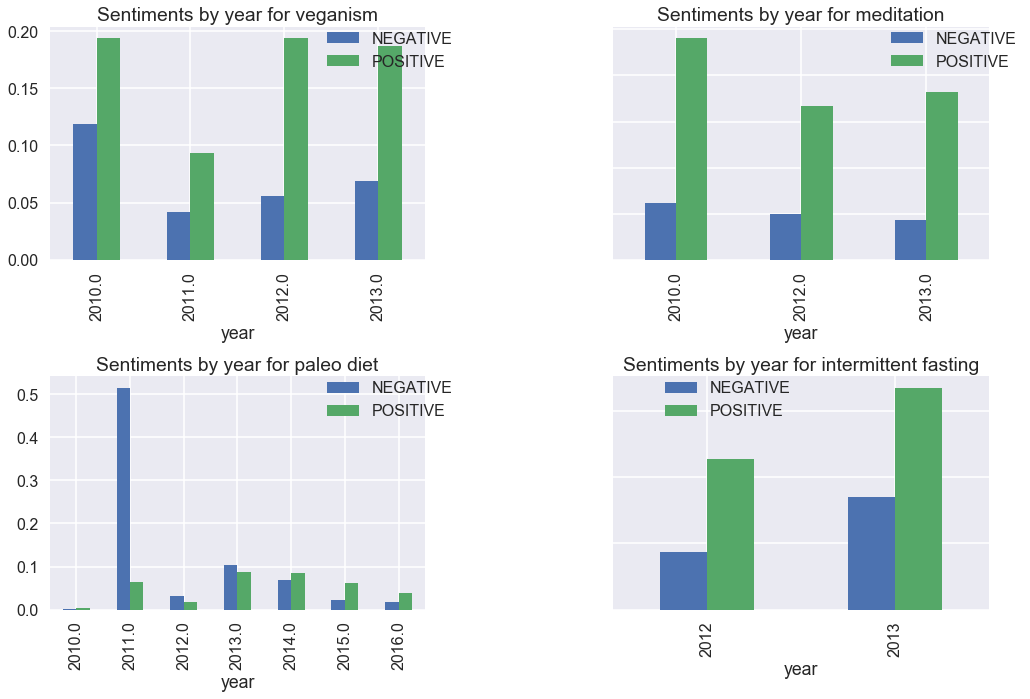

In [190]:
dataframes=[[grouped_vegan,grouped_medit],[grouped_paleo,grouped_fast]]
titles=[['Sentiments by year for veganism','Sentiments by year for meditation'],['Sentiments by year for paleo diet','Sentiments by year for intermittent fasting']]
barplots(dataframes,titles,(15,10))
plt.show()

In [141]:
grouped_vegan_likes=data_vegan_swiss[['sentiment','likes']].groupby(['sentiment']).mean()
grouped_medit_likes=data_medit_swiss[['sentiment','likes']].groupby(['sentiment']).mean()
grouped_paleo_likes=data_paleo_swiss[['sentiment','likes']].groupby(['sentiment']).mean()

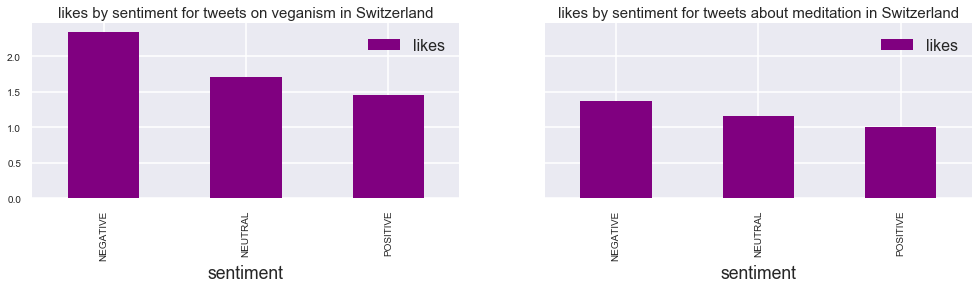

In [142]:
fig, axes = plt.subplots(1,2, figsize=(15,3),sharey=True)

titles=['likes by sentiment for tweets on veganism in Switzerland','likes by sentiment for tweets about meditation in Switzerland']
grouped_vegan_likes.plot.bar(ax=axes[0],title=titles[0],fontsize=10,color=['purple'])
grouped_medit_likes.plot.bar(ax=axes[1],title=titles[1],fontsize=10,color=['purple'])
axes[0].title.set_size(15)

axes[1].title.set_size(15)
plt.style.use('fivethirtyeight')
#axes[i,j].legend(loc='center left', bbox_to_anchor=(.7, .9))  
plt.show()

In [143]:
data_vegan_swiss['count']=np.ones(len(data_vegan_swiss))
data_medit_swiss['count']=np.ones(len(data_medit_swiss))
data_paleo_swiss['count']=np.ones(len(data_paleo_swiss))

grouped_vegan_gender=data_vegan_swiss[['sentiment','author_gender','count']].groupby(['sentiment','author_gender']).count().unstack(1)
grouped_medit_gender=data_medit_swiss[['sentiment','author_gender','count']].groupby(['sentiment','author_gender']).count().unstack(1)
grouped_paleo_gender=data_paleo_swiss[['sentiment','author_gender','count']].groupby(['sentiment','author_gender']).count().unstack(1)

grouped_vegan_gender.columns = grouped_vegan_gender.columns.droplevel()
grouped_medit_gender.columns = grouped_medit_gender.columns.droplevel()
grouped_paleo_gender.columns = grouped_paleo_gender.columns.droplevel()
grouped_vegan_gender
grouped_vegan_gender=grouped_vegan_gender.apply(lambda x : x/(x['MALE']+x['FEMALE']+x['UNKNOWN']),axis=1)
grouped_medit_gender=grouped_medit_gender.apply(lambda x : x/(x['MALE']+x['FEMALE']+x['UNKNOWN']),axis=1)
grouped_paleo_gender=grouped_paleo_gender.apply(lambda x : x/(x['MALE']+x['FEMALE']+x['UNKNOWN']),axis=1)

grouped_vegan_gender=grouped_vegan_gender.drop('UNKNOWN', axis=1)
grouped_medit_gender=grouped_medit_gender.drop('UNKNOWN', axis=1)
grouped_paleo_gender=grouped_paleo_gender.drop('UNKNOWN', axis=1)

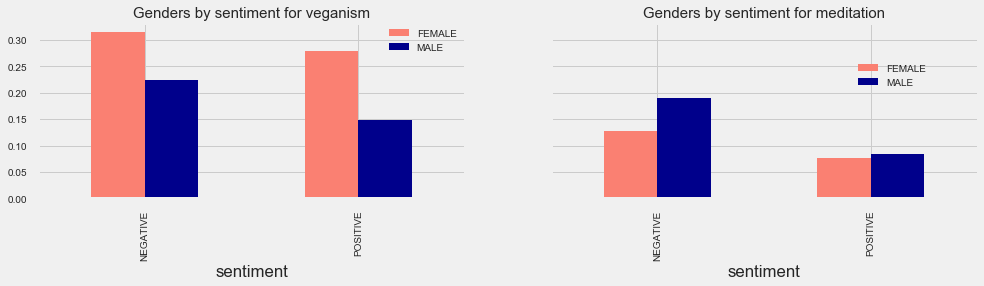

In [144]:
fig, axes = plt.subplots(1,2, figsize=(15,3),sharey=True)

titles=['Genders by sentiment for veganism','Genders by sentiment for meditation']
grouped_vegan_gender.drop('NEUTRAL',axis=0).plot.bar(ax=axes[0],title=titles[0],fontsize=10,color=['salmon','darkblue'])
grouped_medit_gender.drop('NEUTRAL',axis=0).plot.bar(ax=axes[1],title=titles[1],fontsize=10,color=['salmon','darkblue'])
axes[0].title.set_size(15)

axes[1].title.set_size(15)
plt.style.use('seaborn')
axes[0].legend(loc='center left', bbox_to_anchor=(.8, .9))  
axes[1].legend(loc='center left', bbox_to_anchor=(.7, .7))  

plt.show()